#Forecasting 90d conversion
Not all of our customers buy an insurance policy on the day they install the Cover app. It’s crucial for our
sales and marketing teams to understand how a cohort of customers convert as time passes since the
day they onboarded. Please explore and analyze the data provided to understand how sales conversion
rate evolves as a function of time. Then, create a forecasting methodology that can be used to forecast a
cohorts terminal (you can use 90 day) sales conversion rate at defined intervals of time.

when company should / should not spend on paid marketing to acquire customers. Please make a recommendation for if we should only spend on particular days/time, or if not, why not?

The assumption is there is only one method in the company to sell the product.
Step1. Customer should install the app
Step2. Customer who are interested request the quote
Step3. Customers who think the range of prices are reasonable will call agent
Step4. After talking to agent customers will purchase the app.  

Initial Analysis
1.	Developers are doing great job as almost 100% of customers have no issue installing the app
2.	After installing the app, 75% of customers are tempting to purchase the product which indicates the quality of the app is good and it is in high demand.
3.	After the quote, 75% of customers who requested the quote find the price reasonable will to call agent to negotiate
4.	Only 8% of customers who talked to agent bought the product which is a huge drop!   

Now the question is while customers were aware of product price range, call the agent and lose their interest to replace the order! 



In [69]:
from google.colab import drive
drive.mount("/content/drive")


Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [70]:
import pandas as pd
import numpy as np
import os
import datetime
import matplotlib.pyplot as plt

In [71]:
df = pd.read_csv('/content/drive/MyDrive/Cover.csv')


Basic column information. Looking for missing data, type of data


In [72]:
print (df.describe())
print (df.info())
print (df.isnull().sum())

             user_id
count  132296.000000
mean   131166.652952
std     38236.338992
min     64922.000000
25%     98046.750000
50%    131156.500000
75%    164286.250000
max    197393.000000
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 132296 entries, 0 to 132295
Data columns (total 5 columns):
 #   Column                          Non-Null Count   Dtype 
---  ------                          --------------   ----- 
 0   user_id                         132296 non-null  int64 
 1   installation_at                 132290 non-null  object
 2   request_created_at              99058 non-null   object
 3   agent_responded_to_customer_at  74394 non-null   object
 4   customer_sold_at                5741 non-null    object
dtypes: int64(1), object(4)
memory usage: 5.0+ MB
None
user_id                                0
installation_at                        6
request_created_at                 33238
agent_responded_to_customer_at     57902
customer_sold_at                  126555
dtype: int64


In [73]:
#change the cols to time format
df["installation_at"] = pd.to_datetime(df["installation_at"], infer_datetime_format=True)  # change the format to datetime64[ns]
df["request_created_at"] = pd.to_datetime(df["request_created_at"], infer_datetime_format=True)  
df["agent_responded_to_customer_at"] = pd.to_datetime(df["agent_responded_to_customer_at"], infer_datetime_format=True)  
df["customer_sold_at"] = pd.to_datetime(df["customer_sold_at"], infer_datetime_format=True)  


In [74]:
rate_app=(1- df.installation_at.isnull().sum()/df.shape[0])*100
count_installed = df.shape[0]- df.installation_at.isnull().sum()
print ('Almost {:.0f} % of customers, {:.0f}, could successfully install the app'.format(round(rate_app,0),count_installed))

Almost 100 % of customers, 132290, could successfully install the app


In [75]:
count_requested = df.shape[0] - df.request_created_at.isnull().sum()
rate_request=100*(count_requested)/count_installed
print ('{:.0f} % of customers requested the quote'.format(round(rate_request,0)))

75 % of customers requested the quote


In [76]:
count_talked_to_agent = df.shape[0] - df.agent_responded_to_customer_at.isnull().sum()
talked_to_agent = 100*(count_talked_to_agent)/count_requested
print ('{:.0f} % of customers followed up with agent'.format(round(talked_to_agent,0)))

75 % of customers followed up with agent


In [77]:
count_product_sold = df.shape[0] - df.customer_sold_at.isnull().sum()
product_sold = 100*(count_product_sold/count_talked_to_agent)
print ('{:.0f} % of customers bought the product'.format(round(product_sold,0)))

8 % of customers bought the product


Create a delta Time column

In [78]:
df_sold=df.dropna(axis=0)
df_sold["Delta_Time"] = 0  # create Delta_Time column

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:2: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy



In [79]:
for k in range(0, df_sold.shape[0]):
    df_sold["Delta_Time"].iloc[k] =(((df_sold["customer_sold_at"].iloc[k] - df_sold["agent_responded_to_customer_at"].iloc[k]).total_seconds())/3600)

print ('{:.0f} days take to finalize sale'.format(round(df_sold["Delta_Time"].mean()/24,0)))


/usr/local/lib/python3.7/dist-packages/pandas/core/indexing.py:670: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:2: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy



14 days take to finalize sale


There are some invalid Time values in the dataset such as min and max and must be removed

In [80]:
df_sold["Delta_Time"].describe()

count    5691.000000
mean      342.360124
std       867.060042
min     -5477.083333
25%         3.500000
50%        47.583333
75%       280.675000
max      8619.716667
Name: Delta_Time, dtype: float64

In [82]:
print ('{:.0f} mean hours take the agent respond to customer!!'.format(round(df_sold["Delta_Time"].mean(),0)))

342 mean hours take the agent respond to customer!!


Text(0.5, 1.0, 'distribution of days take to finalize the sales')

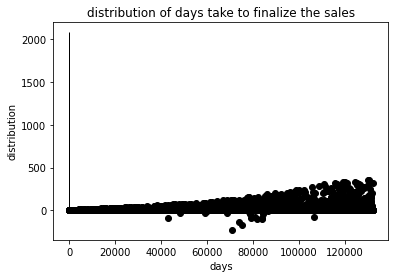

In [83]:
plt.plot(df_sold["Delta_Time"] / 24, 'o', color='black')
plt.xlabel('index');
plt.ylabel('days');
plt.title('N days take to finalize the sales')

plt.hist(df_sold["Delta_Time"] / 24, color='blue', edgecolor='black', bins=100)
plt.xlabel('days');
plt.ylabel('distribution');
plt.title('distribution of days take to finalize the sales')


In [84]:
wrong_input = df_sold[df_sold["Delta_Time"] < 0].count().tolist()
sell_greaterthan100days = df_sold[df_sold["Delta_Time"] >= 2400].count().tolist()

print('{:f}% wrong data and {:f}% sell takes longer than 100 days'.format(100 * wrong_input[0] / df_sold.shape[0],
                                                                          100 * sell_greaterthan100days[0] /
                                                                          df_sold.shape[0]))


0.369004% wrong data and 3.391320% sell takes longer than 100 days


In [85]:
# filter out wrong date and sell greater than 100 days
df_sold2 = df_sold.loc[(df_sold["Delta_Time"] > 0) & (df_sold["Delta_Time"] < 2400)]

for k in range(0, df_sold2.shape[0]):
    df_sold2["Delta_Time"].iloc[k] = (((df_sold2["customer_sold_at"].iloc[k] -
                                        df_sold2["agent_responded_to_customer_at"].iloc[k]).total_seconds()) / 3600)
print('{:f} days take to finalize sale'.format(round(df_sold2["Delta_Time"].mean() / 24, 0)))


/usr/local/lib/python3.7/dist-packages/pandas/core/indexing.py:670: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:6: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy



9.000000 days take to finalize sale


In [87]:
df_sold2["Delta_Time"].describe()



count    5476.000000
mean      217.047632
std       392.778681
min         0.016667
25%         3.258333
50%        44.758333
75%       227.000000
max      2377.233333
Name: Delta_Time, dtype: float64

In [88]:
df_sold2["Delta_Time"] = 0  # create Delta_Time column
for k in range(0, df_sold2.shape[0]):
    df_sold2["Delta_Time"].iloc[k] = (((df_sold2["agent_responded_to_customer_at"].iloc[k] -
                                        df_sold2["request_created_at"].iloc[k]).total_seconds()) / 3600)

df_sold2["Delta_Time"].describe()
print('{:.0f} hours take the agent respond to customer'.format(round(df_sold2["Delta_Time"].mean(), 0)))


/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:1: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy

/usr/local/lib/python3.7/dist-packages/pandas/core/indexing.py:670: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:4: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy



39 hours take the agent respond to customer


Text(0.5, 1.0, 'N days take to agent replies the customer')

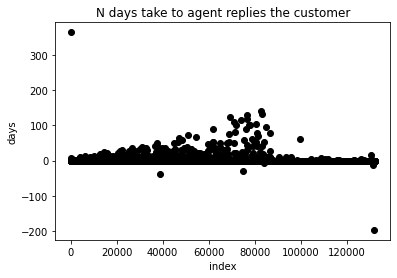

In [89]:
plt.plot(df_sold2["Delta_Time"] / 24, 'o', color='black')
plt.xlabel('index');
plt.ylabel('days');
plt.title('N days take to agent replies the customer')


(array([1.000e+00, 0.000e+00, 0.000e+00, 0.000e+00, 0.000e+00, 0.000e+00,
        0.000e+00, 0.000e+00, 0.000e+00, 0.000e+00, 0.000e+00, 0.000e+00,
        0.000e+00, 0.000e+00, 0.000e+00, 0.000e+00, 0.000e+00, 0.000e+00,
        0.000e+00, 0.000e+00, 0.000e+00, 0.000e+00, 0.000e+00, 0.000e+00,
        0.000e+00, 0.000e+00, 0.000e+00, 0.000e+00, 0.000e+00, 0.000e+00,
        0.000e+00, 0.000e+00, 0.000e+00, 0.000e+00, 0.000e+00, 0.000e+00,
        0.000e+00, 0.000e+00, 0.000e+00, 0.000e+00, 0.000e+00, 0.000e+00,
        0.000e+00, 0.000e+00, 0.000e+00, 0.000e+00, 0.000e+00, 0.000e+00,
        0.000e+00, 0.000e+00, 0.000e+00, 5.205e+03, 1.180e+02, 4.100e+01,
        2.100e+01, 1.700e+01, 9.000e+00, 8.000e+00, 9.000e+00, 2.000e+00,
        6.000e+00, 4.000e+00, 3.000e+00, 3.000e+00, 2.000e+00, 3.000e+00,
        1.000e+00, 0.000e+00, 1.000e+00, 2.000e+00, 1.000e+00, 2.000e+00,
        2.000e+00, 1.000e+00, 1.000e+00, 2.000e+00, 1.000e+00, 2.000e+00,
        0.000e+00, 4.000e+00, 0.000e+0

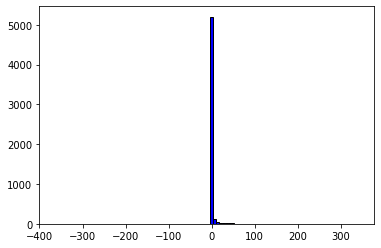

In [101]:
plt.hist(df_sold2["Delta_Time"] / 24, color = 'blue', edgecolor = 'black',bins = 100)


As shown above the majority of sell takes less than 3 days but some orders (193) takes more than 100 days. Around 0.4% of the input date are wrong and around 3% of sells take more than 100 days. Company needs to investigate the root cause of sell delays more than 100 days! 
 
It takes the average of 42 hours or almost two days for customers to request the quote and takes 39 hours for agent to contact the customer. The large time delay between quote and agent could be one of the reason that customers lose their purchase interest. Customers might request quotes at the same time from other companies which the quick reply is the key of success here. Customers will move on to the competitors when they don’t hear right away from us! On the other hand the finalizing the sale takes the average of 9 days and median of 44 hours or almost 2 days! 

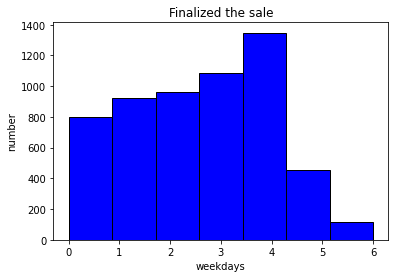

In [93]:
#finalize the sale
p=df_sold["customer_sold_at"].dt.dayofweek

plt.hist(p, color = 'blue', edgecolor = 'black',bins = 7)

# Add labels
plt.title('Finalized the sale')
plt.xlabel('weekdays');
plt.ylabel('number');




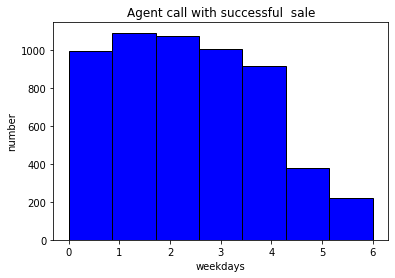

In [94]:
#Agent successful call
p=df_sold["agent_responded_to_customer_at"].dt.dayofweek
plt.hist(p, color = 'blue', edgecolor = 'black',bins = 7)
# Add labels
plt.title('Agent call with successful  sale')
plt.xlabel('weekdays');
plt.ylabel('number');

Our studies indicates that Fridays are the most successful days for sales and weekends (Saturday and Sunday) have minimum sale amount. 

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:1: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy



(array([252., 133.,  84., 100.,  80.,  80.,  47.,  33.,  25.,  17.,  22.,
         21.,  26.,  39., 164., 495., 604., 568., 556., 365., 492., 477.,
        528., 483.]),
 array([ 0.        ,  0.95833333,  1.91666667,  2.875     ,  3.83333333,
         4.79166667,  5.75      ,  6.70833333,  7.66666667,  8.625     ,
         9.58333333, 10.54166667, 11.5       , 12.45833333, 13.41666667,
        14.375     , 15.33333333, 16.29166667, 17.25      , 18.20833333,
        19.16666667, 20.125     , 21.08333333, 22.04166667, 23.        ]),
 <a list of 24 Patch objects>)

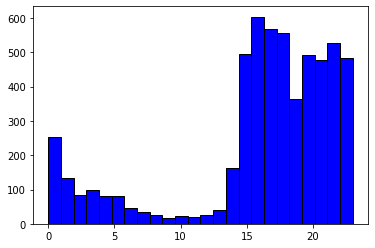

In [95]:
df_sold['agent_responded_hour'] = df_sold['agent_responded_to_customer_at'].dt.hour

plt.hist(df_sold['agent_responded_hour'], color = 'blue', edgecolor = 'black',bins = 24)


The successful agent sale call after 4pm till 12pm determines that many of customers prefer evening call and surprisingly late night sale is much better than morning and lunch time sale. To reduce the cost of operation weekends operation and morning calls could be cancelled as the majority of sells occurs in the evening and night.



/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:1: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy



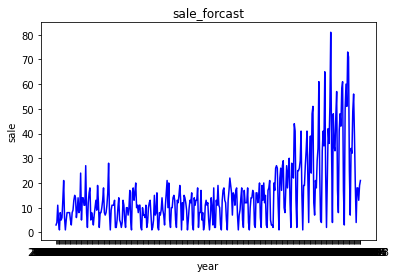

In [96]:
df_sold2["customer_sold_at_date"] = df_sold2['customer_sold_at'].map(lambda x: x.strftime('%Y-%m-%d'))

sale_forcast = df_sold2.groupby('customer_sold_at_date')['user_id'].count()  # .to_frame()
plt.plot(sale_forcast, c='blue')
plt.title('sale_forcast')
plt.xlabel('year');
plt.ylabel('sale');
plt.show()


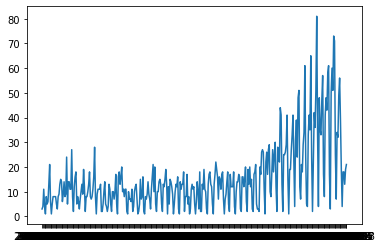

In [97]:
sale_forcast2 = sale_forcast.to_frame()
sale_forcast2.reset_index(level=0, inplace=True)
sale_forcast2.customer_sold_at_date
sale_forcast2.reset_index(drop=True, inplace=False)

sale_forcast2.set_index('customer_sold_at_date', inplace=True)

plt.plot(sale_forcast2)


In general, the number of sale are increasing over the time. The Timeseries could be used to predict 90 days forecast. Apparently, the forecast of sell would be around 70 items average per day. 

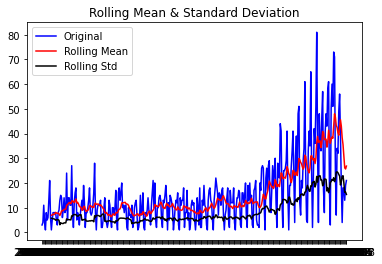

Results of Dickey-Fuller Test:
Test Statistic                  -1.686830
p-value                          0.437911
#Lags Used                      17.000000
Number of Observations Used    342.000000
Critical Value (1%)             -3.449616
Critical Value (5%)             -2.870028
Critical Value (10%)            -2.571292
dtype: float64


In [98]:
from statsmodels.tsa.stattools import adfuller


def test_stationarity(timeseries):
    # Determing rolling statistics
    rolmean = pd.Series(timeseries).rolling(window=12).mean()
    rolstd = pd.Series(timeseries).rolling(window=12).std()

    # Plot rolling statistics:
    orig = plt.plot(timeseries, color='blue', label='Original')
    mean = plt.plot(rolmean, color='red', label='Rolling Mean')
    std = plt.plot(rolstd, color='black', label='Rolling Std')
    plt.legend(loc='best')
    plt.title('Rolling Mean & Standard Deviation')
    plt.show(block=False)

    # Perform Dickey-Fuller test:
    print('Results of Dickey-Fuller Test:')
    dftest = adfuller(timeseries, autolag='AIC')
    dfoutput = pd.Series(dftest[0:4], index=['Test Statistic', 'p-value', '#Lags Used', 'Number of Observations Used'])
    for key, value in dftest[4].items():
        dfoutput['Critical Value (%s)' % key] = value
    print(dfoutput)


test_stationarity(sale_forcast2['user_id'])


In [102]:
import pandas as pd
import numpy as np
import os
import datetime
import matplotlib.pyplot as plt
from statsmodels.tsa.stattools import adfuller
from statsmodels.graphics.tsaplots import plot_acf, plot_pacf
import seaborn as sns
from math import sqrt
#from prophet import Prophet
#import logging



#pip install cmdstanpy==0.9.5 Prophet

In [106]:
from fbprophet import Prophet
import logging

logging.getLogger().setLevel(logging.ERROR)

In [108]:

df = pd.read_csv("/content/drive/MyDrive/sale_forecast.csv")

In [109]:
df.head()
df.columns

Index(['customer_sold_at_date', 'user_id'], dtype='object')

In [110]:
# Reading the data

df['Data'] = pd.to_datetime(df['customer_sold_at_date'], dayfirst=True)
df.sort_values('Data', inplace=True)
df.rename(columns={'user_id': 'NumOfSale'},inplace=True)
df =df[['Data','NumOfSale']]
df.set_index('Data', inplace=True)
df.head()

,NumOfSale
Data,
2018-10-10,3
2018-10-11,4
2018-10-12,11
2018-10-13,4
2018-10-14,1


# Creating Training and Testing set

We have a price history of approximately 1 years, we will reserve the last **30 working days**  to test the model, there will be 6 comparatives of 5 days each, between the forecasts and current values. All previous data will be used to train the model:


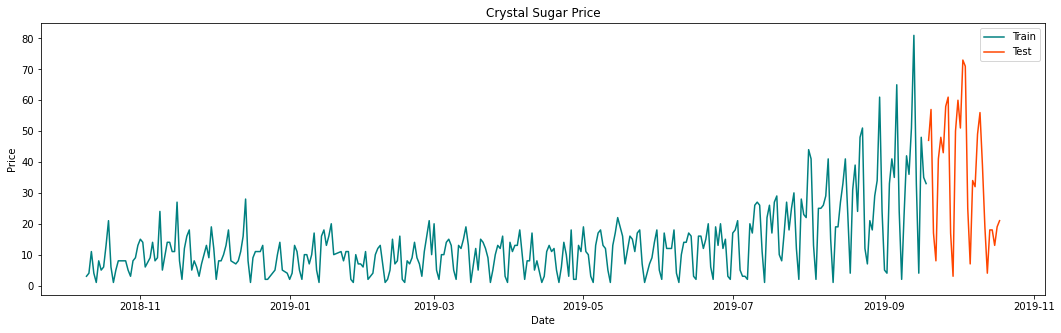

In [111]:
days = 30
train = df.iloc[:-days,0:1].copy()
test = df.iloc[-days:,0:1].copy()

plt.figure(figsize=(18,5))
plt.title('Crystal Sugar Price')
plt.plot(train['NumOfSale'], color='teal')
plt.plot(test['NumOfSale'], color='orangered')
plt.legend(['Train','Test'])
plt.xlabel('Date')
plt.ylabel('Price')
plt.show()


# Stationarity test and verifying correlated lags

In order to create a time series forecast it is necessary that the series is stationary, that is, it has the following relatively constant conditions: mean, variance and autocorrelation.

Below I will use the function to plot the series, its distribution, [autocorrelation](https://en.wikipedia.org/wiki/Autocorrelation), partial autocorrelation and to check the stationarity we will use the [Dickey Fuller](https://en.wikipedia.org/wiki/Dickey%E2%80%93Fuller_test) statistical test:

In [112]:
#creating a function to plot the graph and show the test result:
def check_stationarity(y, lags_plots=48, figsize=(22,8)):
    "Use Series as parameter"
    
    y = pd.Series(y)
    fig = plt.figure()

    ax1 = plt.subplot2grid((3, 3), (0, 0), colspan=2)
    ax2 = plt.subplot2grid((3, 3), (1, 0))
    ax3 = plt.subplot2grid((3, 3), (1, 1))
    ax4 = plt.subplot2grid((3, 3), (2, 0), colspan=2)

    y.plot(ax=ax1, figsize=figsize, color='teal')
    ax1.set_title('Crystal Sugar Price')
    plot_acf(y, lags=lags_plots, zero=False, ax=ax2, color='teal');
    plot_pacf(y, lags=lags_plots, zero=False, ax=ax3, method='ols', color='teal');
    sns.distplot(y, bins=int(sqrt(len(y))), ax=ax4, color='teal')
    ax4.set_title('Price Distribution')

    plt.tight_layout()
    
    print('Dickey-Fuller test results:')
    adfinput = adfuller(y)
    adftest = pd.Series(adfinput[0:4], index=['Statistical Test','P-Value','Used Lags','Observations Number'])
    adftest = round(adftest,4)
    
    for key, value in adfinput[4].items():
        adftest["Critical Values (%s)"%key] = value.round(4)
        
    print(adftest)

To verify if the values on the training data are stationary, we will use the P value of 5% as a basis, if the P-value of this test is less than 5% we may consider the series as stationary:


In [113]:
train

,NumOfSale
Data,
2018-10-10,3
2018-10-11,4
2018-10-12,11
2018-10-13,4
2018-10-14,1
...,...
2019-09-14,33
2019-09-15,4
2019-09-16,48


/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2619: FutureWarning:

`distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).



Dickey-Fuller test results:
Statistical Test           1.5636
P-Value                    0.9977
Used Lags                 13.0000
Observations Number      316.0000
Critical Values (1%)      -3.4512
Critical Values (5%)      -2.8707
Critical Values (10%)     -2.5717
dtype: float64


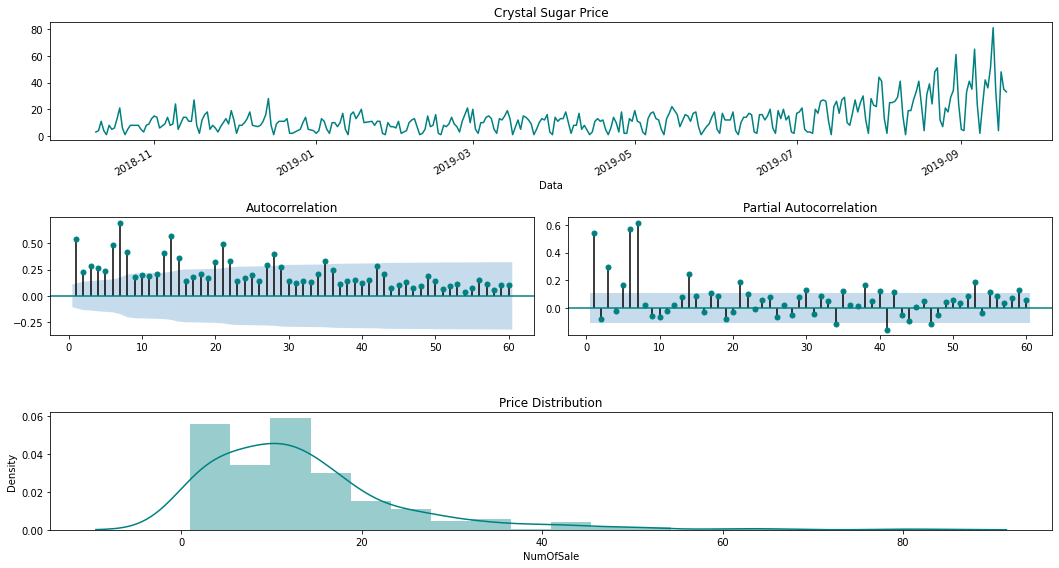

In [114]:
check_stationarity(train['NumOfSale'], lags_plots=60)

Analyzing the graphs, it's noticed that the price series has a slight upward tendency, the distribution graph shows that the data doesn't follow a Gaussian normality, and the characteristics of the autocorrelation show poor correlations in all lags, this also has a sign of seasonality and finally the statistical values informs that the P value was 99%.

Thus, this series does not meet the criteria established to be considered stationary.

I will make the first differentiation to cancel the trend and stay only the day-to-day movements:

In [115]:
train['NumOfSale'].diff().dropna()

Data
2018-10-11     1.0
2018-10-12     7.0
2018-10-13    -7.0
2018-10-14    -3.0
2018-10-15     7.0
              ... 
2019-09-14   -48.0
2019-09-15   -29.0
2019-09-16    44.0
2019-09-17   -13.0
2019-09-18    -2.0
Name: NumOfSale, Length: 329, dtype: float64

/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2619: FutureWarning:

`distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).



Dickey-Fuller test results:
Statistical Test          -7.6983
P-Value                    0.0000
Used Lags                 12.0000
Observations Number      316.0000
Critical Values (1%)      -3.4512
Critical Values (5%)      -2.8707
Critical Values (10%)     -2.5717
dtype: float64


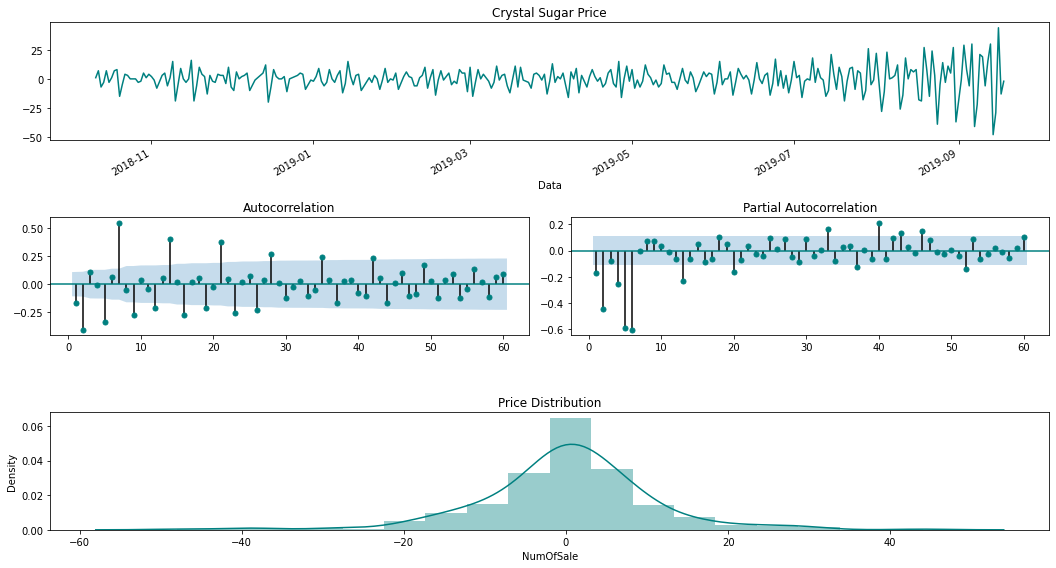

In [118]:
check_stationarity(train['NumOfSale'].diff().dropna(), lags_plots=60)

The Dickey Fuller test returned a P value of zero, which means that the series became stationary, to complement, it's noted in the graph that the trend has disappeared.

In the autocorrelation graph the values slightly decrease with sin behaviour, different from the graph without differentiation.

The partial autocorrelation falls more abruptly, showing that the five andsix values have significant impact on the current values, apparently there is a significant seasonal correlation to be considered in the predictions.

In this way, we may not consider an auto regressive model with the first 6 lags in a differenced series, so we will use this following terminology for the model: ARIMA (6, 1.0) to see how poor it is!!

# Creating the Model

Initially the model will be created based on the training data, thus, the coefficients for the 6 auto correlated lags will be generated and will serve to test the extrapolation of 5 consecutive days in the test set.

There are several ways to make extrapolations for the future, the main ones are:

  * Create a model for each specific day to be forecasted and add everything later in a final model,
  * Recursive, forecasting the first day and use this value as a basis to forecast the next day.
 
We will use the last model in this example, in this case we will forecast the next 5 days, compare with real data, add the latter to the model in order to make a new extrapolation, later we will calculate the error of the model and analyze relevant facts of the forecast.

In [119]:
from statsmodels.tsa.arima_model import ARIMA
# Training the model
model = ARIMA(train, order=(6,1,0)).fit()
train_pred = model.predict()

#

/usr/local/lib/python3.7/dist-packages/statsmodels/tsa/base/tsa_model.py:219: ValueWarning:

A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.

/usr/local/lib/python3.7/dist-packages/statsmodels/tsa/base/tsa_model.py:219: ValueWarning:

A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.



Let us now compare the current data with those forecasted, as the forecast was made on the model with differentiation (as can be seen below) the first real value will be added and summed cumulatively to take back the base price to BRL/bags.

In [120]:
# Prediction base with one differencing
train_pred[:5]

Data
2018-10-11    0.110427
2018-10-12   -0.028629
2018-10-13   -1.937852
2018-10-14   -1.594820
2018-10-15    4.446572
dtype: float64

In [121]:
# Returning the price to BRL/bags
train_pred[0] += train.iloc[0,0]
train_pred = np.cumsum(train_pred)
train_pred.head()

#Now the predicted values will be added in the training DataFrame to plot the graph with the two series:

Data
2018-10-11    3.110427
2018-10-12    3.081798
2018-10-13    1.143947
2018-10-14   -0.450873
2018-10-15    3.995698
dtype: float64

In [122]:
train['NumOfSale Pred'] = train_pred
train.dropna(inplace=True)
train.head()

,NumOfSale,NumOfSale Pred
Data,,
2018-10-11,4,3.110427
2018-10-12,11,3.081798
2018-10-13,4,1.143947
2018-10-14,1,-0.450873
2018-10-15,8,3.995698


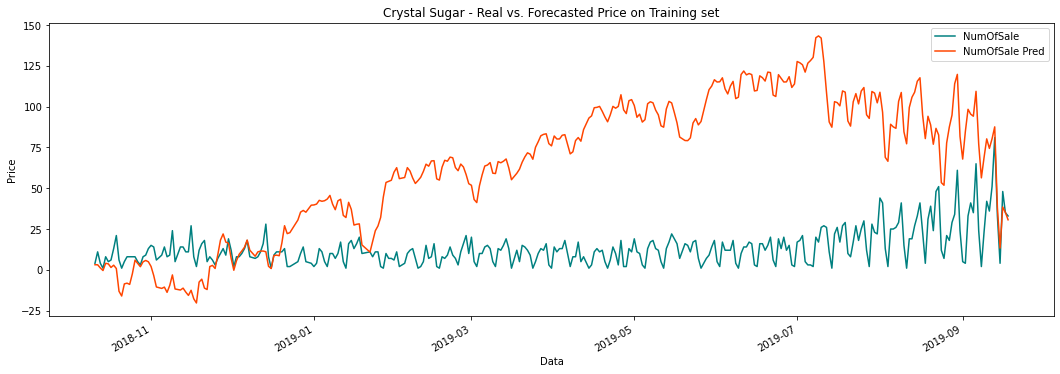

In [ ]:
# Plotting the graph
train.plot(figsize=(18,6), 
            title='Crystal Sugar - Real vs. Forecasted Price on Training set',
           color=['Teal','orangered'])
plt.ylabel('Price')
plt.show()

In [ ]:
#df = customer_sold_at_date.reset_index()
df.columns = ['ds', 'y']
df.head()

,ds,y
0,2018-10-10,3
1,2018-10-11,4
2,2018-10-12,11
3,2018-10-13,4
4,2018-10-14,1


In [ ]:
prediction_size = 30
train_df = df[:-prediction_size]

m = Prophet()
m.fit(train_df)

INFO:numexpr.utils:NumExpr defaulting to 2 threads.
INFO:fbprophet:Disabling yearly seasonality. Run prophet with yearly_seasonality=True to override this.
INFO:fbprophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.


In [ ]:
future = m.make_future_dataframe(periods=30)

forecast = m.predict(future)

In [ ]:
forecast.tail()

,ds,trend,yhat_lower,yhat_upper,trend_lower,trend_upper,additive_terms,additive_terms_lower,additive_terms_upper,weekly,weekly_lower,weekly_upper,multiplicative_terms,multiplicative_terms_lower,multiplicative_terms_upper,yhat
355,2019-10-14,40.212669,32.197400,48.023067,39.924308,40.492935,0.200975,0.200975,0.200975,0.200975,0.200975,0.200975,0.0,0.0,0.0,40.413645
356,2019-10-15,40.458257,34.725108,50.220329,40.153217,40.752954,1.912690,1.912690,1.912690,1.912690,1.912690,1.912690,0.0,0.0,0.0,42.370947
357,2019-10-16,40.703844,35.446858,50.647460,40.381171,41.021158,2.389352,2.389352,2.389352,2.389352,2.389352,2.389352,0.0,0.0,0.0,43.093197
358,2019-10-17,40.949432,36.645145,52.649822,40.608957,41.293724,3.727169,3.727169,3.727169,3.727169,3.727169,3.727169,0.0,0.0,0.0,44.676601
359,2019-10-18,41.195020,41.759479,57.625229,40.835905,41.556060,8.632462,8.632462,8.632462,8.632462,8.632462,8.632462,0.0,0.0,0.0,49.827482


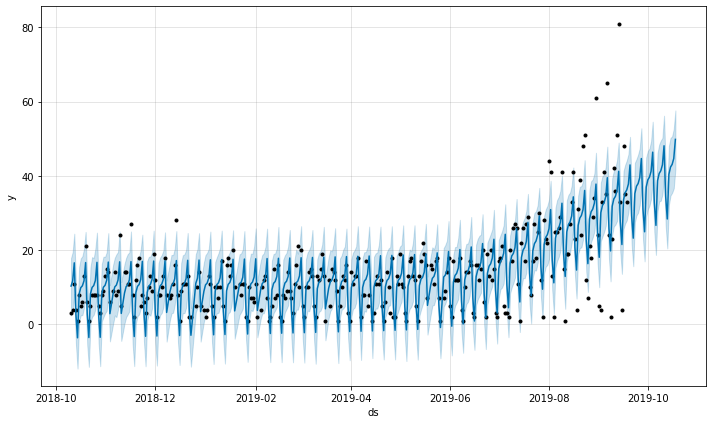

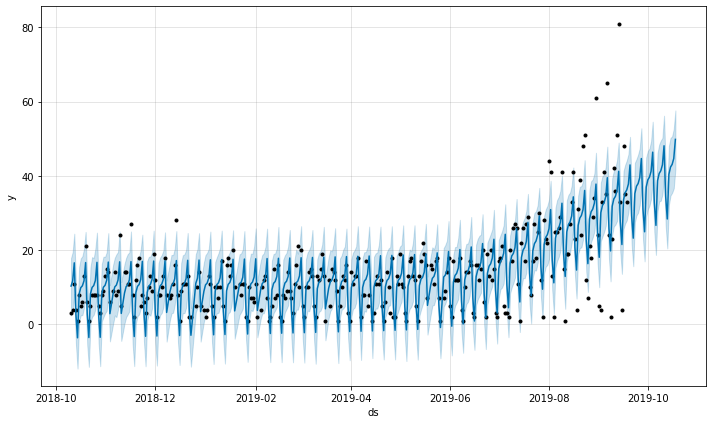

In [ ]:
m.plot(forecast)

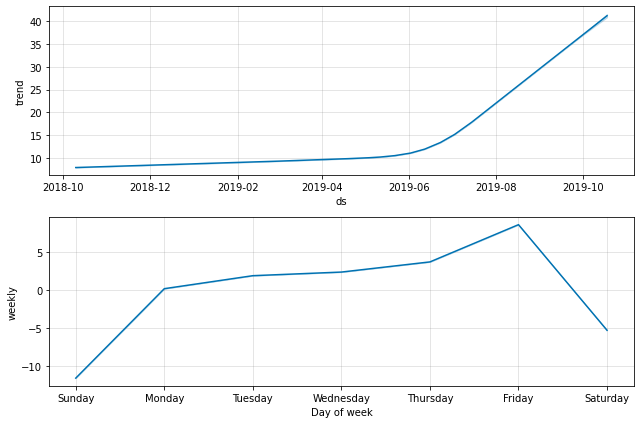

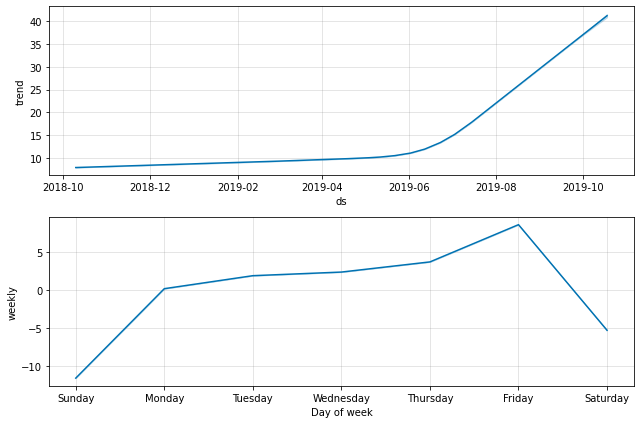

In [ ]:
m.plot_components(forecast)

In [ ]:
# Evaluate the model
def make_comparison_dataframe(historical, forecast):
    return forecast.set_index('ds')[['yhat', 'yhat_lower', 'yhat_upper']].join(historical.set_index('ds'))

cmp_df = make_comparison_dataframe(df, forecast)
cmp_df



,yhat,yhat_lower,yhat_upper,y
ds,,,,
2018-10-10,10.321261,2.415477,17.852649,3
2018-10-11,11.668739,3.680766,19.475680,4
2018-10-12,16.583692,8.198803,24.430346,11
2018-10-13,2.680734,-5.134597,10.849533,4
2018-10-14,-3.611945,-11.893837,4.021414,1
...,...,...,...,...
2019-10-14,40.413645,32.197400,48.023067,18
2019-10-15,42.370947,34.725108,50.220329,18
2019-10-16,43.093197,35.446858,50.647460,13


In [ ]:
def calculate_forecast_errors(df, prediction_size):
    
    df = df.copy()
    
    df['e'] = df['y'] - df['yhat']
    df['p'] = 100 * df['e'] / df['y']
    
    predicted_part = df[-prediction_size:]
    
    error_mean = lambda error_name: np.mean(np.abs(predicted_part[error_name]))
    
    return {'MAPE': error_mean('p'), 'MAE': error_mean('e')}

for err_name, err_value in calculate_forecast_errors(cmp_df, prediction_size).items():
    print(err_name, err_value)

MAPE 108.62610971572126
MAE 16.221409651449644


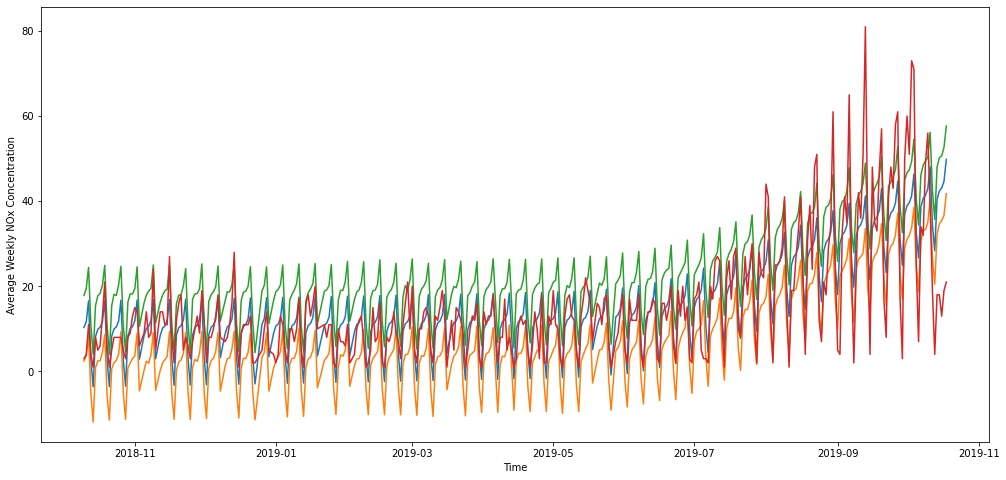

In [ ]:
plt.figure(figsize=(17, 8))
plt.plot(cmp_df['yhat'])
plt.plot(cmp_df['yhat_lower'])
plt.plot(cmp_df['yhat_upper'])
plt.plot(cmp_df['y'])
plt.xlabel('Time')
plt.ylabel('Average Weekly NOx Concentration')
plt.grid(False)
plt.show()

In [ ]:
df.set_index('ds', inplace=True)
df.head()

,y
ds,
2018-10-10,3
2018-10-11,4
2018-10-12,11
2018-10-13,4
2018-10-14,1


INFO:matplotlib.category:Using categorical units to plot a list of strings that are all parsable as floats or dates. If these strings should be plotted as numbers, cast to the appropriate data type before plotting.
INFO:matplotlib.category:Using categorical units to plot a list of strings that are all parsable as floats or dates. If these strings should be plotted as numbers, cast to the appropriate data type before plotting.


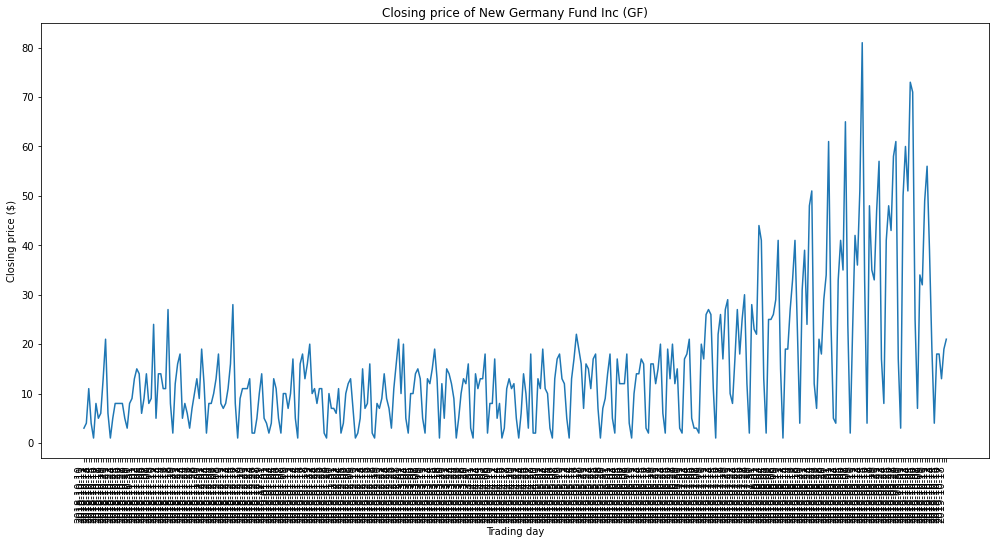

In [ ]:
plt.figure(figsize=(17, 8))
plt.plot(df.y)
plt.title('Closing price of New Germany Fund Inc (GF)')
plt.ylabel('Closing price ($)')
plt.xticks(rotation=90, ha='right')
plt.xlabel('Trading day')
plt.grid(False)
plt.show()

In [ ]:

def plot_moving_average(series, window, plot_intervals=False, scale=1.96):

    rolling_mean = series.rolling(window=window).mean()
    
    plt.figure(figsize=(17,8))
    plt.title('Moving average\n window size = {}'.format(window))
    plt.plot(rolling_mean, 'g', label='Rolling mean trend')
    
    #Plot confidence intervals for smoothed values
    if plot_intervals:
        mae = mean_absolute_error(series[window:], rolling_mean[window:])
        deviation = np.std(series[window:] - rolling_mean[window:])
        lower_bound = rolling_mean - (mae + scale * deviation)
        upper_bound = rolling_mean + (mae + scale * deviation)
        plt.plot(upper_bound, 'r--', label='Upper bound / Lower bound')
        plt.plot(lower_bound, 'r--')
            
    plt.plot(series[window:], label='Actual values')
    plt.legend(loc='best')
    plt.grid(True)

INFO:matplotlib.category:Using categorical units to plot a list of strings that are all parsable as floats or dates. If these strings should be plotted as numbers, cast to the appropriate data type before plotting.
INFO:matplotlib.category:Using categorical units to plot a list of strings that are all parsable as floats or dates. If these strings should be plotted as numbers, cast to the appropriate data type before plotting.
INFO:matplotlib.category:Using categorical units to plot a list of strings that are all parsable as floats or dates. If these strings should be plotted as numbers, cast to the appropriate data type before plotting.
INFO:matplotlib.category:Using categorical units to plot a list of strings that are all parsable as floats or dates. If these strings should be plotted as numbers, cast to the appropriate data type before plotting.


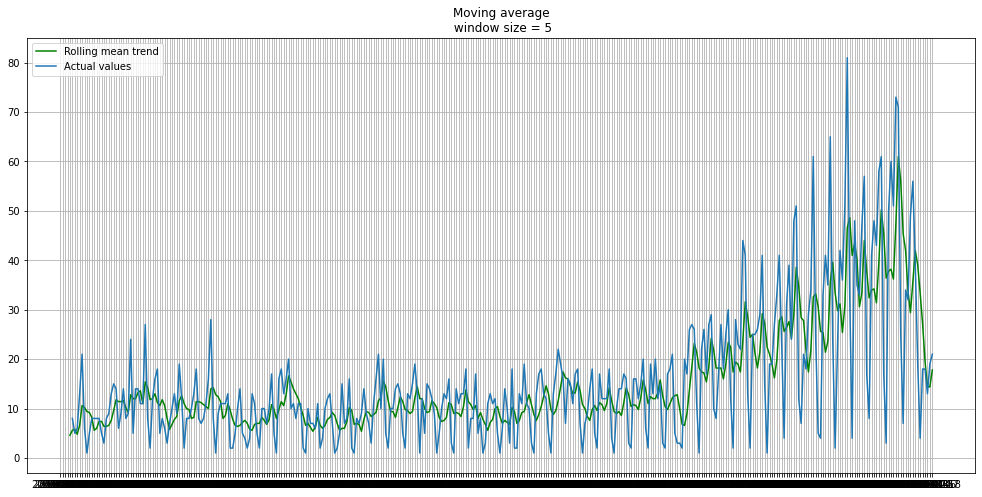

In [ ]:
#Smooth by the previous 5 days (by week)
plot_moving_average(df.y, 5)

INFO:matplotlib.category:Using categorical units to plot a list of strings that are all parsable as floats or dates. If these strings should be plotted as numbers, cast to the appropriate data type before plotting.
INFO:matplotlib.category:Using categorical units to plot a list of strings that are all parsable as floats or dates. If these strings should be plotted as numbers, cast to the appropriate data type before plotting.
INFO:matplotlib.category:Using categorical units to plot a list of strings that are all parsable as floats or dates. If these strings should be plotted as numbers, cast to the appropriate data type before plotting.
INFO:matplotlib.category:Using categorical units to plot a list of strings that are all parsable as floats or dates. If these strings should be plotted as numbers, cast to the appropriate data type before plotting.


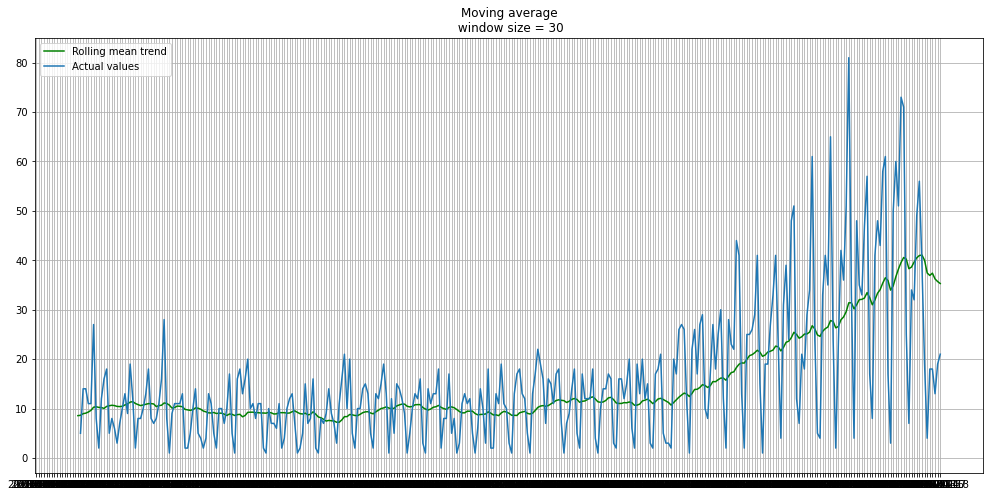

In [ ]:

#Smooth by the previous month (30 days)
plot_moving_average(df.y, 30)

In [ ]:
from sklearn.metrics import r2_score, median_absolute_error, mean_absolute_error
from sklearn.metrics import median_absolute_error, mean_squared_error, mean_squared_log_error

INFO:matplotlib.category:Using categorical units to plot a list of strings that are all parsable as floats or dates. If these strings should be plotted as numbers, cast to the appropriate data type before plotting.
INFO:matplotlib.category:Using categorical units to plot a list of strings that are all parsable as floats or dates. If these strings should be plotted as numbers, cast to the appropriate data type before plotting.
INFO:matplotlib.category:Using categorical units to plot a list of strings that are all parsable as floats or dates. If these strings should be plotted as numbers, cast to the appropriate data type before plotting.
INFO:matplotlib.category:Using categorical units to plot a list of strings that are all parsable as floats or dates. If these strings should be plotted as numbers, cast to the appropriate data type before plotting.
INFO:matplotlib.category:Using categorical units to plot a list of strings that are all parsable as floats or dates. If these strings should

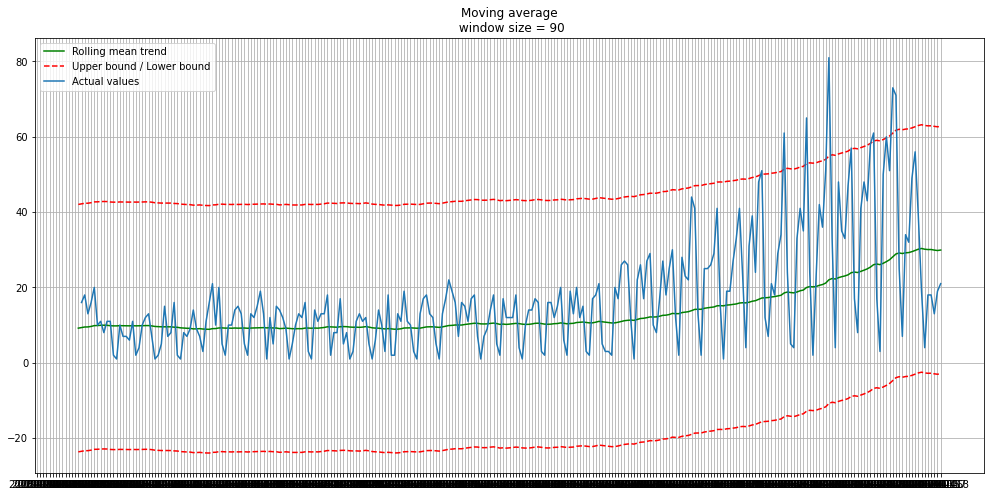

In [ ]:
#Smooth by previous quarter (90 days)
plot_moving_average(df.y, 90, plot_intervals=True)

In [ ]:
def exponential_smoothing(series, alpha):

    result = [series[0]] # first value is same as series
    for n in range(1, len(series)):
        result.append(alpha * series[n] + (1 - alpha) * result[n-1])
    return result

In [ ]:
def plot_exponential_smoothing(series, alphas):
 
    plt.figure(figsize=(17, 8))
    for alpha in alphas:
        plt.plot(exponential_smoothing(series, alpha), label="Alpha {}".format(alpha))
    plt.plot(series.values, "c", label = "Actual")
    plt.legend(loc="best")
    plt.axis('tight')
    plt.title("Exponential Smoothing")
    plt.grid(True);

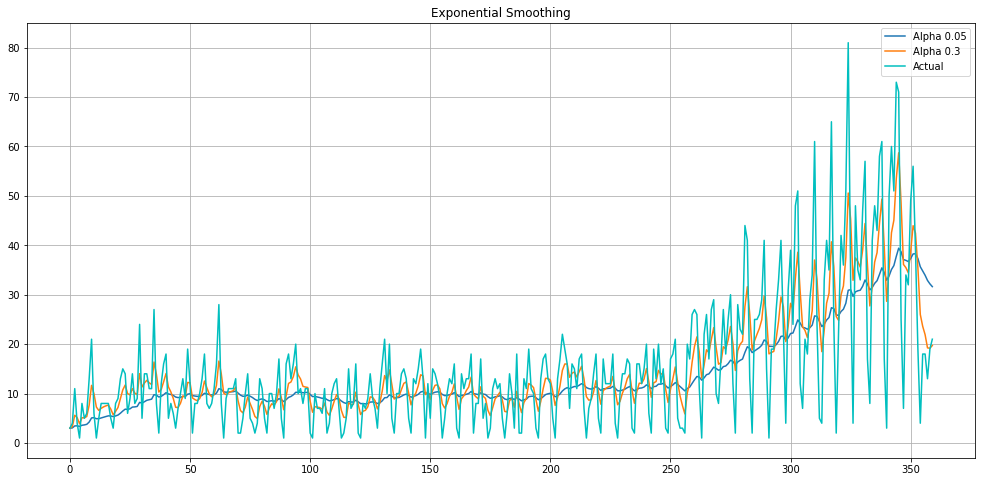

In [ ]:
plot_exponential_smoothing(df.y, [0.05, 0.3])

In [ ]:
https://towardsdatascience.com/the-complete-guide-to-time-series-analysis-and-forecasting-70d476bfe775   Marco

https://towardsdatascience.com/an-end-to-end-project-on-time-series-analysis-and-forecasting-with-python-4835e6bf050b